In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

10.70983542276744 54.99771007565337
-19.4229937912868 -54.54917092077139
88.53165349906186 -25.680999151529875
-18.94266370551921 -177.90192197544954
89.60830770539954 -173.5426616530178
62.69659976303555 17.051928837072722
16.723195394015775 137.46996611805815
-20.518238018253555 57.615819532843204
88.4545611005534 161.021733895461
-5.293943940346452 161.2720346516059
-3.7946555048189055 25.37980357750817
67.28125306007638 -10.863041893278279
80.54256673212382 -175.09816573710626
-85.92379891779117 -19.23207502429804
26.149030268216833 -162.67256809234203
89.08403923354527 -65.98941120270918
-9.513069788121868 -85.28816287385814
5.143753655545126 -98.66882468801846
16.55887931644142 -75.6962056102727
75.23138791695374 123.99578694837487
-65.84321162678211 62.13373113566567
-2.804708917600294 -71.91128952760349
-8.924096353011635 -33.023594793717024
85.77266594680415 40.217271218564434
-52.629624756329946 -7.7003040488120575
16.959719687355047 -84.12769863446906
-75.42983037501605 172.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bargal
City not found. Skipping...
Processing Record 2 of Set 1 | camapua
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | timra
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | camp diable
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | buala
Processing Record 11 of Set 1 | kindu
Processing Record 12 of Set 1 | hofn
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | sechura
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | morant bay
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set

Processing Record 38 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 4 | auki
Processing Record 40 of Set 4 | bilibino
Processing Record 41 of Set 4 | zhanaozen
Processing Record 42 of Set 4 | praia
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 46 of Set 4 | salmo
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | cayenne
Processing Record 49 of Set 4 | tanout
Processing Record 50 of Set 4 | iguaba grande
Processing Record 1 of Set 5 | puga
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | marovoay
Processing Record 4 of Set 5 | okha
Processing Record 5 of Set 5 | axim
Processing Record 6 of Set 5 | port hedland
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | ipixuna
Processing Record 10 of Set 5 | inhambane
Processing Record 11 o

Processing Record 25 of Set 8 | dunedin
Processing Record 26 of Set 8 | jiangyou
Processing Record 27 of Set 8 | sayyan
Processing Record 28 of Set 8 | progreso
Processing Record 29 of Set 8 | dalvik
Processing Record 30 of Set 8 | nanma
Processing Record 31 of Set 8 | dhidhdhoo
Processing Record 32 of Set 8 | mar del plata
Processing Record 33 of Set 8 | tabou
Processing Record 34 of Set 8 | yakovlevka
Processing Record 35 of Set 8 | blackwater
Processing Record 36 of Set 8 | rocha
Processing Record 37 of Set 8 | san cristobal
Processing Record 38 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 8 | soanierana ivongo
Processing Record 40 of Set 8 | luena
Processing Record 41 of Set 8 | flinders
Processing Record 42 of Set 8 | abu samrah
Processing Record 43 of Set 8 | marzuq
Processing Record 44 of Set 8 | abnub
Processing Record 45 of Set 8 | marsa matruh
Processing Record 46 of Set 8 | bay city
Processing Record 47 of Set 8 | petropavlovsk-kamchatskiy
Pro

Processing Record 11 of Set 12 | verkhnyaya inta
Processing Record 12 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 13 of Set 12 | chama
Processing Record 14 of Set 12 | porbandar
Processing Record 15 of Set 12 | utiroa
City not found. Skipping...
Processing Record 16 of Set 12 | meyungs
City not found. Skipping...
Processing Record 17 of Set 12 | porto novo
Processing Record 18 of Set 12 | tilichiki
Processing Record 19 of Set 12 | qabis
City not found. Skipping...
Processing Record 20 of Set 12 | swan hill
Processing Record 21 of Set 12 | thayetmyo
Processing Record 22 of Set 12 | pemba
Processing Record 23 of Set 12 | egvekinot
Processing Record 24 of Set 12 | magadan
Processing Record 25 of Set 12 | goksun
Processing Record 26 of Set 12 | morehead
Processing Record 27 of Set 12 | tungor
Processing Record 28 of Set 12 | vallejo
Processing Record 29 of Set 12 | bacolod
Processing Record 30 of Set 12 | geraldton
Processing Record 31 of Set 12 | makakil

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camapua,-19.5314,-54.0439,80.35,58,80,2.98,BR,2022-11-23 22:22:10
1,Vaini,-21.2000,-175.2000,84.36,74,40,5.75,TO,2022-11-23 22:21:12
2,Timra,62.4870,17.3257,26.67,86,100,5.75,SE,2022-11-23 22:22:11
3,Airai,-8.9266,125.4092,62.92,85,100,1.86,TL,2022-11-23 22:22:12
4,Camp Diable,-20.4628,57.5789,74.23,88,40,6.91,MU,2022-11-23 22:22:12
5,Cherskiy,68.7500,161.3000,-26.50,97,99,2.37,RU,2022-11-23 22:22:13
6,Buala,-8.1450,159.5921,83.73,72,35,7.18,SB,2022-11-23 22:22:13
7,Kindu,-2.9500,25.9500,68.07,99,67,1.07,CD,2022-11-23 22:22:14
8,Hofn,64.2539,-15.2082,40.21,80,100,22.91,IS,2022-11-23 22:22:14
9,Ushuaia,-54.8000,-68.3000,44.26,65,75,28.77,AR,2022-11-23 22:20:04


In [12]:
# Reorder columns and add to dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Camapua,BR,2022-11-23 22:22:10,-19.5314,-54.0439,80.35,58,80,2.98
1,Vaini,TO,2022-11-23 22:21:12,-21.2000,-175.2000,84.36,74,40,5.75
2,Timra,SE,2022-11-23 22:22:11,62.4870,17.3257,26.67,86,100,5.75
3,Airai,TL,2022-11-23 22:22:12,-8.9266,125.4092,62.92,85,100,1.86
4,Camp Diable,MU,2022-11-23 22:22:12,-20.4628,57.5789,74.23,88,40,6.91
5,Cherskiy,RU,2022-11-23 22:22:13,68.7500,161.3000,-26.50,97,99,2.37
6,Buala,SB,2022-11-23 22:22:13,-8.1450,159.5921,83.73,72,35,7.18
7,Kindu,CD,2022-11-23 22:22:14,-2.9500,25.9500,68.07,99,67,1.07
8,Hofn,IS,2022-11-23 22:22:14,64.2539,-15.2082,40.21,80,100,22.91
9,Ushuaia,AR,2022-11-23 22:20:04,-54.8000,-68.3000,44.26,65,75,28.77


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

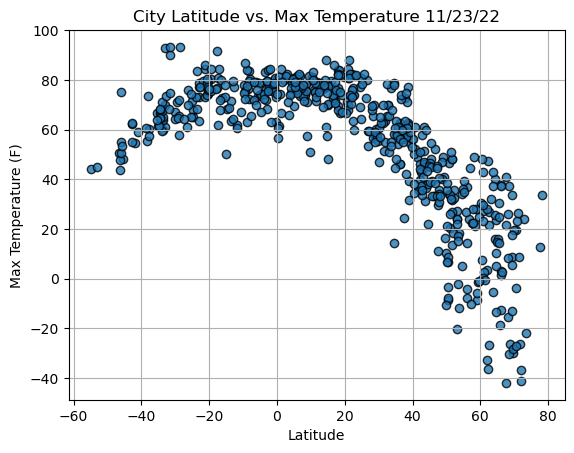

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

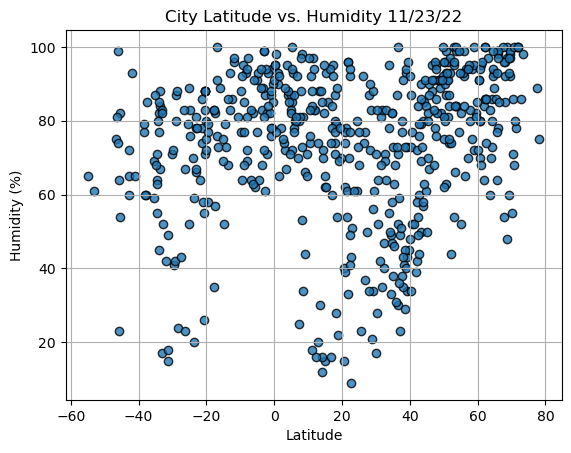

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

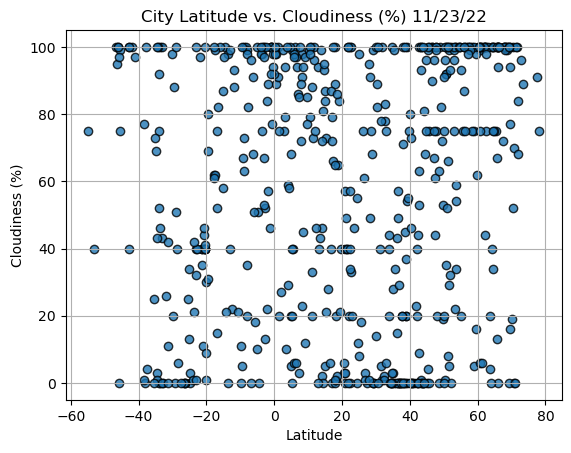

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

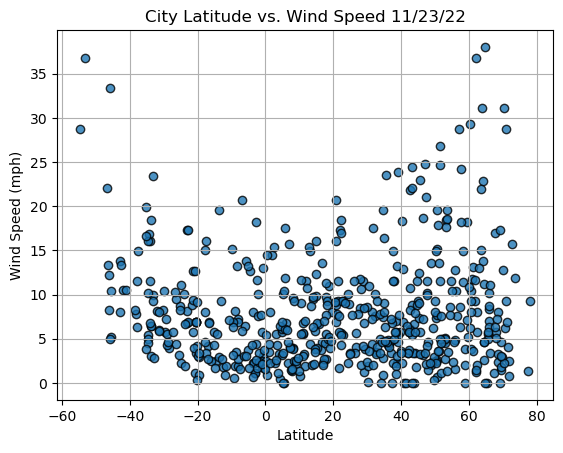

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2022-11-23 22:22:16
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    76.96
Humidity                       94
Cloudiness                     77
Wind Speed                    3.0
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Timra,SE,2022-11-23 22:22:11,62.4870,17.3257,26.67,86,100,5.75
5,Cherskiy,RU,2022-11-23 22:22:13,68.7500,161.3000,-26.50,97,99,2.37
8,Hofn,IS,2022-11-23 22:22:14,64.2539,-15.2082,40.21,80,100,22.91
10,Kapaa,US,2022-11-23 22:22:15,22.0752,-159.3190,82.38,70,20,17.27
11,Qaanaaq,GL,2022-11-23 22:22:15,77.4840,-69.3632,12.52,89,91,1.34


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

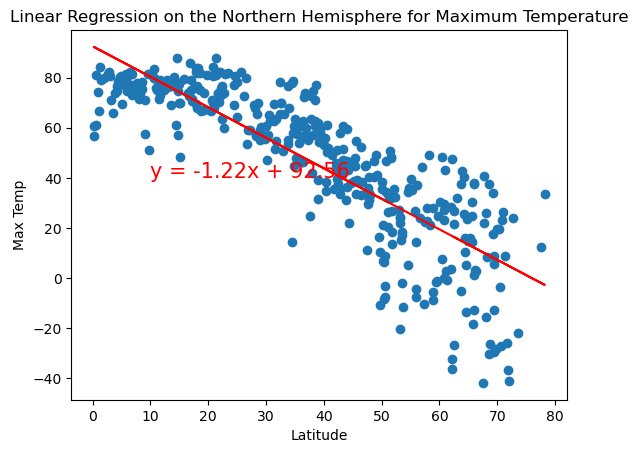

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

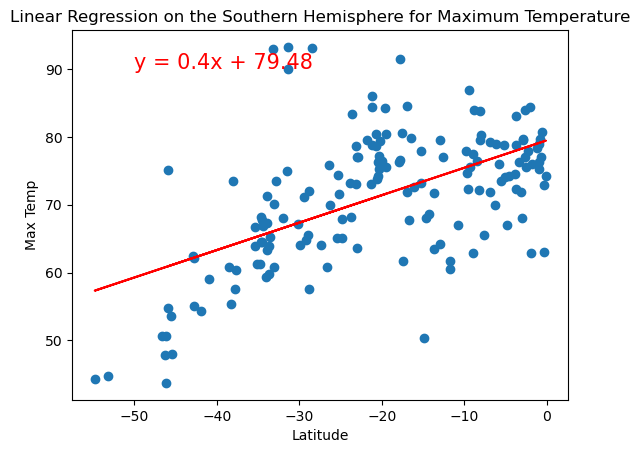

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

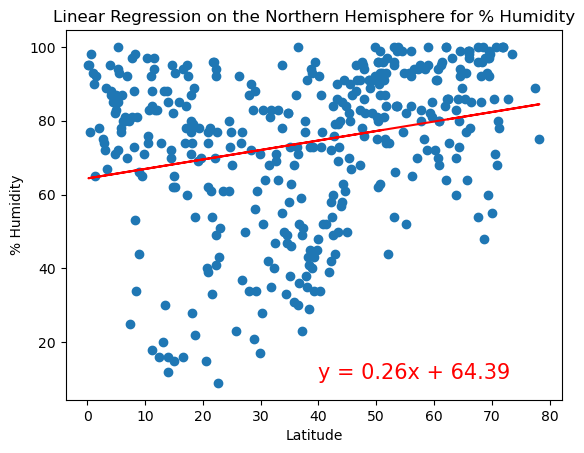

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

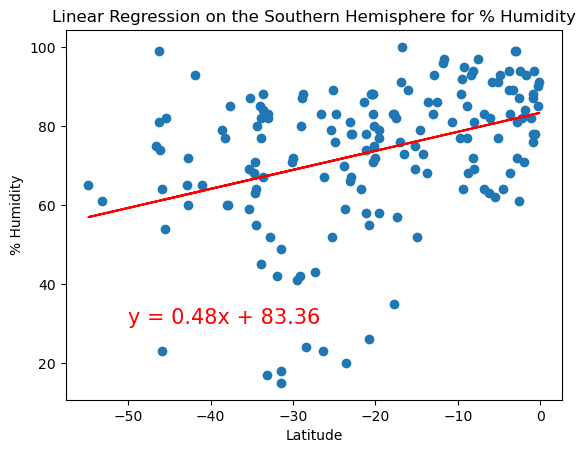

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,30))

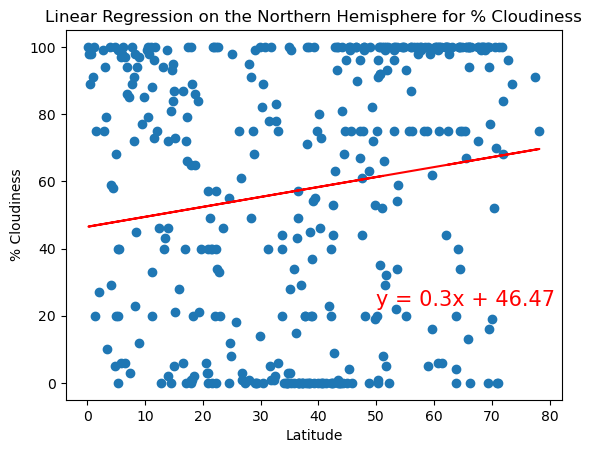

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(50,23))

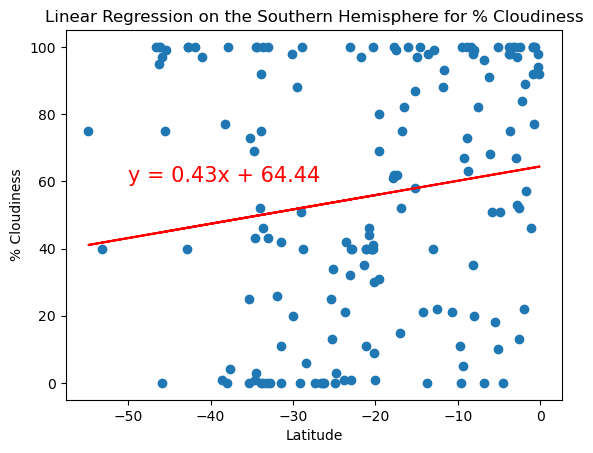

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

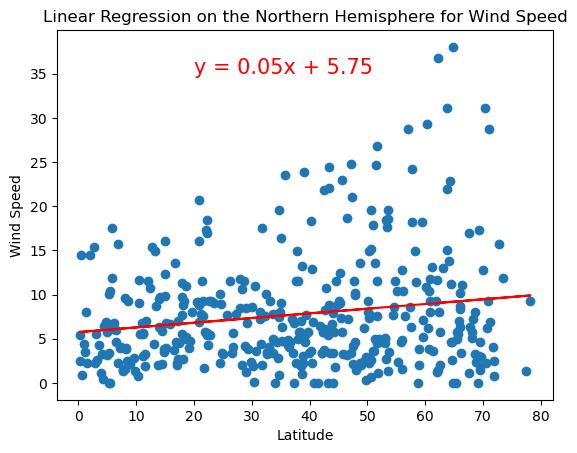

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(20,35))

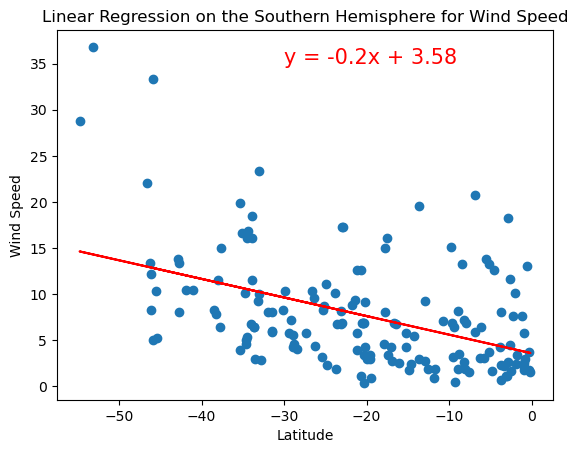

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,35))